In [21]:
!pip install datasist
!pip install imblearn

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [3]:
df=pd.read_csv('train (2).csv')

# 1-gathering the data

In [3]:
df.head()

,ID,Gender,DOB,Lead_Creation_Date,City_Code,City_Category,Employer_Code,Employer_Category1,Employer_Category2,Monthly_Income,...,Contacted,Source,Source_Category,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Approved
0,APPC90493171225,Female,23/07/79,15/07/16,C10001,A,COM0044082,A,4.0,2000.0,...,N,S122,G,0.0,NaN,NaN,NaN,NaN,0,0
1,APPD40611263344,Male,07/12/86,04/07/16,C10003,A,COM0000002,C,1.0,3500.0,...,Y,S122,G,0.0,20000.0,2.0,13.25,953.0,10,0
2,APPE70289249423,Male,10/12/82,19/07/16,C10125,C,COM0005267,C,4.0,2250.0,...,Y,S143,B,0.0,45000.0,4.0,NaN,NaN,0,0
3,APPF80273865537,Male,30/01/89,09/07/16,C10477,C,COM0004143,A,4.0,3500.0,...,Y,S143,B,0.0,92000.0,5.0,NaN,NaN,7,0
4,APPG60994436641,Male,19/04/85,20/07/16,C10002,A,COM0001781,A,4.0,10000.0,...,Y,S134,B,2500.0,50000.0,2.0,NaN,NaN,10,0


In [4]:
df.isnull().sum()
df.nunique()

ID                                     69713
Gender                                     2
DOB                                    10759
Lead_Creation_Date                        92
City_Code                                678
City_Category                              3
Employer_Code                          36617
Employer_Category1                         3
Employer_Category2                         4
Monthly_Income                          5010
Customer_Existing_Primary_Bank_Code       57
Primary_Bank_Type                          2
Contacted                                  2
Source                                    29
Source_Category                            7
Existing_EMI                            3245
Loan_Amount                              196
Loan_Period                                6
Interest_Rate                             72
EMI                                     2179
Var1                                       5
Approved                                   2
dtype: int

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69713 entries, 0 to 69712
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   69713 non-null  object 
 1   Gender                               69713 non-null  object 
 2   City_Code                            68899 non-null  object 
 3   City_Category                        68899 non-null  object 
 4   Employer_Category1                   65695 non-null  object 
 5   Employer_Category2                   65415 non-null  float64
 6   Customer_Existing_Primary_Bank_Code  60322 non-null  object 
 7   Primary_Bank_Type                    60322 non-null  object 
 8   Contacted                            69713 non-null  object 
 9   Source                               69713 non-null  object 
 10  Source_Category                      69713 non-null  object 
 11  Loan_Amount                 

# 2-cleaning of data

In [4]:
del df['ID'],df['DOB'],df['Lead_Creation_Date'],df['Employer_Code'],df['Monthly_Income'],df['Existing_EMI'],df['EMI']


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69713 entries, 0 to 69712
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Gender                               69713 non-null  object 
 1   City_Code                            68899 non-null  object 
 2   City_Category                        68899 non-null  object 
 3   Employer_Category1                   65695 non-null  object 
 4   Employer_Category2                   65415 non-null  float64
 5   Customer_Existing_Primary_Bank_Code  60322 non-null  object 
 6   Primary_Bank_Type                    60322 non-null  object 
 7   Contacted                            69713 non-null  object 
 8   Source                               69713 non-null  object 
 9   Source_Category                      69713 non-null  object 
 10  Loan_Amount                          42004 non-null  float64
 11  Loan_Period                 

## 2-1 remove duplicates

In [8]:
df.drop_duplicates()

,Gender,City_Code,City_Category,Employer_Category1,Employer_Category2,Customer_Existing_Primary_Bank_Code,Primary_Bank_Type,Contacted,Source,Source_Category,Loan_Amount,Loan_Period,Interest_Rate,Var1,Approved
0,Female,C10001,A,A,4.0,B001,P,N,S122,G,NaN,NaN,NaN,0,0
1,Male,C10003,A,C,1.0,B002,P,Y,S122,G,20000.0,2.0,13.25,10,0
2,Male,C10125,C,C,4.0,B003,G,Y,S143,B,45000.0,4.0,NaN,0,0
3,Male,C10477,C,A,4.0,B003,G,Y,S143,B,92000.0,5.0,NaN,7,0
4,Male,C10002,A,A,4.0,B001,P,Y,S134,B,50000.0,2.0,NaN,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69708,Female,C10006,A,A,1.0,B002,P,N,S122,G,NaN,NaN,NaN,10,0
69709,Female,C10116,C,A,4.0,B002,P,N,S122,G,NaN,NaN,NaN,7,0
69710,Female,C10022,B,C,4.0,B030,P,Y,S122,G,24000.0,4.0,35.50,2,0
69711,Male,C10002,A,C,3.0,B002,P,Y,S122,G,80000.0,5.0,NaN,10,0


In [9]:
df.duplicated().sum()

17175

## 2-check and impute nulls 

In [11]:
df.describe()

,Employer_Category2,Loan_Amount,Loan_Period,Interest_Rate,Var1,Approved
count,65415.000000,42004.000000,42004.000000,22276.000000,69713.000000,69713.000000
mean,3.720187,39429.982859,3.890629,19.213570,3.948446,0.014631
std,0.807374,30727.595990,1.167491,5.847136,3.819214,0.120073
min,1.000000,5000.000000,1.000000,11.990000,0.000000,0.000000
25%,4.000000,20000.000000,3.000000,15.250000,0.000000,0.000000
50%,4.000000,30000.000000,4.000000,18.000000,2.000000,0.000000
75%,4.000000,50000.000000,5.000000,20.000000,7.000000,0.000000
max,4.000000,300000.000000,6.000000,37.000000,10.000000,1.000000


In [10]:
df.describe(include='O')

,Gender,City_Code,City_Category,Employer_Category1,Customer_Existing_Primary_Bank_Code,Primary_Bank_Type,Contacted,Source,Source_Category
count,69713,68899,68899,65695,60322,60322,69713,69713,69713
unique,2,678,3,3,57,2,2,29,7
top,Male,C10001,A,A,B001,P,Y,S122,B
freq,39949,10007,49885,33336,14197,39619,45275,30941,29812


In [11]:
df['Employer_Category2'].value_counts()

4.0    57582
1.0     4258
2.0     1955
3.0     1620
Name: Employer_Category2, dtype: int64

In [5]:



df['City_Code'].fillna('C10001',inplace=True)
df['City_Category'].fillna('A',inplace=True)
df['Employer_Category1'].fillna('A',inplace=True)
df['Employer_Category2'].fillna(3.720187,inplace=True)
df['Customer_Existing_Primary_Bank_Code'].fillna('B001',inplace=True)
df['Primary_Bank_Type'].fillna('P',inplace=True)

# here we put mean of loan amount
df['Loan_Amount'].fillna(39429.982859,inplace=True)
df['Loan_Period'].fillna(3.890629,inplace=True)
df['Interest_Rate'].fillna(19.213570,inplace=True)




In [44]:
# make sure that the data is clean
df.isnull().sum()

Gender                                 0
DOB                                    0
Lead_Creation_Date                     0
City_Code                              0
City_Category                          0
Employer_Code                          0
Employer_Category1                     0
Employer_Category2                     0
Monthly_Income                         0
Customer_Existing_Primary_Bank_Code    0
Primary_Bank_Type                      0
Contacted                              0
Source                                 0
Source_Category                        0
Existing_EMI                           0
Loan_Amount                            0
Loan_Period                            0
Interest_Rate                          0
EMI                                    0
Var1                                   0
Approved                               0
dtype: int64

# replace data types
## set each column in suitable data type

In [48]:
#df['Employer_Category2']=df['Employer_Category2'].astype('object')

# Encoding categorical 
## make one hot encoder

In [6]:
cat_col=list(df.describe(include='O').columns)
df=pd.get_dummies(df,cat_col,drop_first=True)
df

,Employer_Category2,Loan_Amount,Loan_Period,Interest_Rate,Var1,Approved,Gender_Male,City_Code_C10002,City_Code_C10003,City_Code_C10004,...,Source_S159,Source_S160,Source_S161,Source_S162,Source_Category_B,Source_Category_C,Source_Category_D,Source_Category_E,Source_Category_F,Source_Category_G
0,4.0,39429.982859,3.890629,19.21357,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1.0,20000.000000,2.000000,13.25000,10,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,4.0,45000.000000,4.000000,19.21357,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,4.0,92000.000000,5.000000,19.21357,7,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,4.0,50000.000000,2.000000,19.21357,10,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69708,1.0,39429.982859,3.890629,19.21357,10,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
69709,4.0,39429.982859,3.890629,19.21357,7,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
69710,4.0,24000.000000,4.000000,35.50000,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
69711,3.0,80000.000000,5.000000,19.21357,10,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [15]:

X=df.drop('Approved',axis=1)
y=df['Approved'].values

C:\Users\xps\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

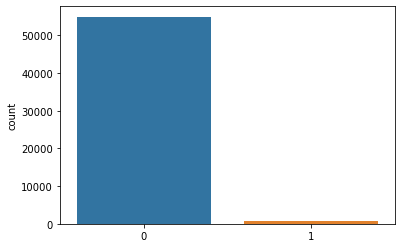

In [13]:
sns.countplot(y_train)

In [ ]:
#this is called impalanced dataset

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [17]:
smote=SMOTE()
X_train_smote ,y_train_smote=smote.fit_resample(X_train,y_train)

C:\Users\xps\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

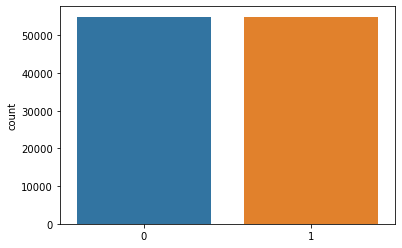

In [12]:
sns.countplot(y_train_smote)

In [ ]:
# with the smote way the data became palanced data

# make model selection

## 1-try descission tree model

In [10]:
from sklearn.metrics import accuracy_score,classification_report
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(X_train_smote,y_train_smote)
y_train_pred=model.predict(X_train_smote)
print('training accuracy',accuracy_score(y_train_pred,y_train_smote))
y_pred=model.predict(X_test)
print('testing accuracy',accuracy_score(y_pred,y_test))

training accuracy 0.9842675159235669
testing accuracy 0.9429104209997848


In [ ]:
# there is an overfitting 

# 2-naive_bayes  model

In [22]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(X_train_smote,y_train_smote)
y_train_pred=model.predict(X_train_smote)
print('training accuracy',accuracy_score(y_train_pred,y_train_smote))
y_pred=model.predict(X_test)
print('testing accuracy',accuracy_score(y_pred,y_test))

training accuracy 0.6898726114649681
testing accuracy 0.5173922398336083


In [23]:
# there is correlation between the features

# 3-KNeighborsClassifier

In [11]:
# poc proof of concept
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=10)
model.fit(X_train_smote,y_train_smote)
y_train_pred=model.predict(X_train_smote)
print('training accuracy',accuracy_score(y_train_pred,y_train_smote))
y_pred=model.predict(X_test)
print('testing accuracy',accuracy_score(y_pred,y_test))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

training accuracy 0.9046223839854413
testing accuracy 0.8466614071577135
              precision    recall  f1-score   support

           0       0.99      0.85      0.92     13743
           1       0.03      0.36      0.06       200

    accuracy                           0.85     13943
   macro avg       0.51      0.61      0.49     13943
weighted avg       0.98      0.85      0.90     13943

[[11733  2010]
 [  128    72]]


In [ ]:
# it isnot high accuracy it be better for sample of the data not in big dataset

# there is an overfitting

# 4-LogisticRegression model

In [18]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train_smote,y_train_smote)
y_train_pred=model.predict(X_train_smote)
y_pred=model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.64      0.74      0.69     47971
           1       0.77      0.68      0.73     61929

    accuracy                           0.71    109900
   macro avg       0.71      0.71      0.71    109900
weighted avg       0.72      0.71      0.71    109900

[[35416 12555]
 [19534 42395]]


In [ ]:
# it isnt high accuracy

<AxesSubplot:>

# 5-RandomForestClassifier

In [20]:
# bagging 
# making parts of the data and make testing for partial of the data
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=50)
model.fit(X_train_smote,y_train_smote)
y_train_pred=model.predict(X_train_smote)
print('training accuracy',accuracy_score(y_train_pred,y_train_smote))
y_pred=model.predict(X_test)
print('testing accuracy',accuracy_score(y_pred,y_test))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

training accuracy 0.9841856232939036
testing accuracy 0.9607688445815105
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     54554
           1       0.99      0.98      0.98     55346

    accuracy                           0.98    109900
   macro avg       0.98      0.98      0.98    109900
weighted avg       0.98      0.98      0.98    109900

[[53883   671]
 [ 1067 54279]]


In [ ]:
# this is an acceptable model there is no overfiting

# 6-GradientBoosting

In [13]:
# boosting
from sklearn.ensemble import GradientBoostingClassifier
model=GradientBoostingClassifier(n_estimators=100)
model.fit(X_train_smote,y_train_smote)
y_train_pred=model.predict(X_train_smote)
print('training accuracy',accuracy_score(y_train_pred,y_train_smote))
y_pred=model.predict(X_test)
print('testing accuracy',accuracy_score(y_pred,y_test))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

training accuracy 0.8961328480436761
testing accuracy 0.9013842071290253
              precision    recall  f1-score   support

           0       0.99      0.91      0.95     13743
           1       0.04      0.27      0.07       200

    accuracy                           0.90     13943
   macro avg       0.51      0.59      0.51     13943
weighted avg       0.97      0.90      0.94     13943

[[12515  1228]
 [  147    53]]


In [ ]:
# this an acceptable model 

In [27]:
!pip install lightgbm

# 7- lightgbm

In [29]:
#  it deal with large dataset and it is fast
import lightgbm as ltb
model = ltb.LGBMClassifier()
model.fit(X_train_smote, y_train_smote)
print(); print(model)
    
expected_y  = y_test
    
predicted_y = model.predict(X_test)
print(classification_report(expected_y, predicted_y))
print(confusion_matrix(expected_y, predicted_y))


LGBMClassifier()
              precision    recall  f1-score   support

           0       0.99      0.96      0.97     13743
           1       0.04      0.11      0.06       200

    accuracy                           0.95     13943
   macro avg       0.51      0.54      0.52     13943
weighted avg       0.97      0.95      0.96     13943

[[13227   516]
 [  178    22]]


# 8-Adaboost model

In [19]:
# it is fast,simple and easy algorithm it deal with numeric and text dataset
from sklearn.ensemble import AdaBoostClassifier
model=AdaBoostClassifier(n_estimators=100)
model.fit(X_train_smote,y_train_smote)
y_pred=model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.88      0.93     13743
           1       0.03      0.23      0.05       200

    accuracy                           0.87     13943
   macro avg       0.51      0.56      0.49     13943
weighted avg       0.97      0.87      0.92     13943

[[12137  1606]
 [  153    47]]


# 9- xgboost

In [25]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


# 9- xgboost

In [26]:
#It provides parallel tree boosting and is the leading machine learning library for 
#regression, classification, and ranking problems.

from xgboost import XGBClassifier
xgb=XGBClassifier(n_estimators=100)
xgb.fit(X_train_smote,y_train_smote)
y_pred=xgb.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97     13743
           1       0.04      0.12      0.06       200

    accuracy                           0.95     13943
   macro avg       0.51      0.54      0.52     13943
weighted avg       0.97      0.95      0.96     13943

[[13172   571]
 [  176    24]]


In [31]:
from sklearn.ensemble import GradientBoostingClassifier
gp= GradientBoostingClassifier(n_estimators=200)
gp.fit(X_train_smote,y_train_smote)
y_pred=gp.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     13743
           1       0.04      0.21      0.07       200

    accuracy                           0.92     13943
   macro avg       0.51      0.57      0.51     13943
weighted avg       0.97      0.92      0.94     13943

[[12725  1018]
 [  157    43]]


<function matplotlib.pyplot.show(close=None, block=None)>

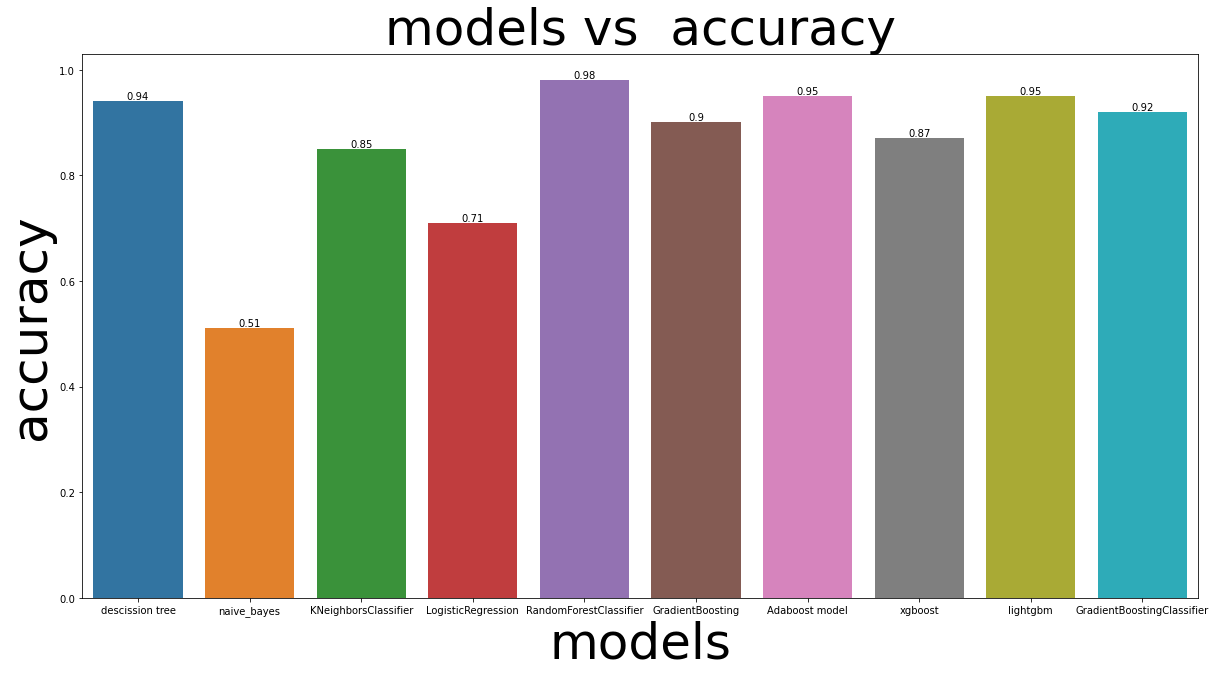

In [66]:
accuracy=pd.DataFrame(
data={'models':['descission tree','naive_bayes','KNeighborsClassifier','LogisticRegression','RandomForestClassifier','GradientBoosting','Adaboost model','xgboost','lightgbm','GradientBoostingClassifier'],
      'accuracy':[.94,.51,.85,.71,.98,.90,0.95,.87, 0.95, 0.92]
    
})
plt.figure(figsize=(20,10))
ax=sns.barplot(x='models',y='accuracy',data=accuracy)
plt.bar_label(ax.containers[0])
plt.title('models vs  accuracy',fontsize=50)
plt.xlabel('models',fontsize=50)
plt.ylabel('accuracy',fontsize=50)
plt.show

In [ ]:
# random forest is the highest algorithm according to accuracy
# we wii make grid search to take the best model in the random forest algorithm

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {

    'max_depth': [4,8,12],
    'max_features': [6,12],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3)
grid_search.fit(X_train_smote,y_train_smote)


In [ ]:
grid_searh.best_estimator_

In [ ]:

Discretization
Now let's discretize some of the numerical attributes. We will work with the age and the hours-per-week as examples.

age_group = [] # define array structure
for age in encoded_data["age"]:
    if age < 25:
        age_group.append("<25")
    elif 25 <= age <= 34:
        age_group.append("25-34")
    elif 34 < age <= 44:
        age_group.append("35-44")
    elif 44 < age <= 54:
        age_group.append("45-54")
    elif 54 < age <= 65:
        age_group.append("55-64")
    else:
        age_group.append("65 and over")
        
# Copy dataframe to keep original 
new_income_df = encoded_data.copy()
new_income_df["age_group"] = age_group
del new_income_df["age"]
​
